In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

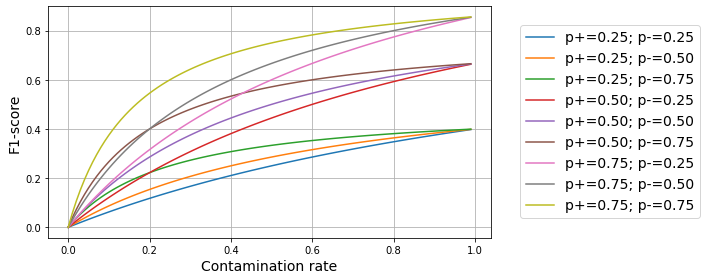

In [2]:
# Produces F1 curves for varying contamination rate (3*3 curves)
plt.figure(figsize=[10,4])
for aa in np.array(range(1, 4))/4:
    for ac in np.array(range(1, 4))/4:
        C = 100
        A = C * np.array(range(100)) / (1 - np.array(range(100))/100) / 100
        prec = aa*A / (aa*A + (1-ac)*C)
        rec = aa
        F1 = 2*prec*rec / (prec+rec)
#         plt.plot(A / (C + A), F1, label=f"$p^+=0.{int(aa*100)}$; $p^-=0.{int(ac*100)}$")
        plt.plot(A / (C + A), F1, label=f"p+=0.{int(aa*100)}; p-=0.{int(ac*100)}")

plt.xlabel("Contamination rate", fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', fontsize=14)
plt.tight_layout()
plt.grid()
plt.savefig(f"./results/F1score_over_A.pdf", format="pdf", dpi=512)
plt.show()

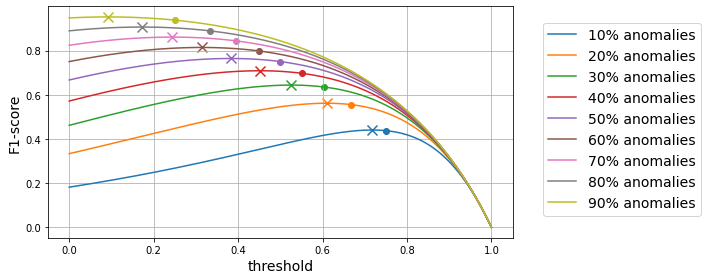

In [3]:
# Produces F1 score curve for a toy example Pa(s) = 2s and pc(s) = 2-2s
prec = 10000
plt.figure(figsize=[10,4])
for i in range(2, 20, 2):
    A = 5*i
    C = 100 - A
    a, b, c = C-A, -2*C, C  # solving FP = FN <=> Ct² - 2Ct + C = At²
    fpfn_threshold = (-math.sqrt(b**2 - 4*a*c) - b) / (2*a) if a != 0 else -c/b
    thresholds = np.arange(prec) / prec
    def f1(t):
        return 2 * A * (1 - t ** 2) / (2 * A * (1 - t ** 2) + C * (t ** 2 - 2 * t + 1) + A * t ** 2)
    F1 = f1(thresholds)
    optimal_threshold = thresholds[np.argmax(F1)]
    line = plt.plot(thresholds, F1, label=f"{A}% anomalies")[0]
    plt.scatter([fpfn_threshold], [f1(fpfn_threshold)], c=line.get_color())
    plt.scatter([optimal_threshold], [f1(optimal_threshold)], marker='x', c=line.get_color(), s=100)

plt.legend(bbox_to_anchor=(1.05, 0.96), loc='upper left', fontsize=14)
plt.xlabel("threshold", fontsize=14)
plt.ylabel("F1-score", fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig(f"./results/F1score_over_threshold.pdf", format="pdf", dpi=512)
plt.show()